In [1]:
import umap
import umap.plot
import hdbscan
import numpy as np
import matplotlib.pyplot as plt
from top2vec import Top2Vec

In [2]:
model = Top2Vec.load("./../models/210205 - top2vec.model")

In [3]:
umap_args = {
    "n_neighbors": 15,
    "n_components": 2,
    "metric": "cosine",
    "random_state": 42,
}
standard_embedding = umap.UMAP(**umap_args).fit(model._get_document_vectors(norm=False))

In [4]:
hdbscan_args = {
    "min_cluster_size": 15,
    "metric": "euclidean",
    "cluster_selection_method": "eom"
}

# cluster = hdbscan.HDBSCAN(**hdbscan_args).fit(standard_embedding.embedding_)
labels = hdbscan.HDBSCAN(**hdbscan_args).fit_predict(standard_embedding.embedding_)

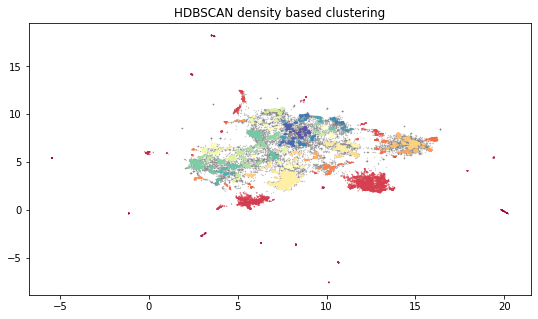

In [6]:
clustered = (labels >= 0)
plt.figure(figsize=(9, 5))
plt.scatter(
    standard_embedding.embedding_[~clustered, 0],
    standard_embedding.embedding_[~clustered, 1],
    c=np.array([0.5, 0.5, 0.5]).reshape(1,-1),
    s=0.1,
    alpha=0.5
)
plt.scatter(
    standard_embedding.embedding_[clustered, 0],
    standard_embedding.embedding_[clustered, 1],
    c=labels[clustered],
    s=0.1,
    cmap="Spectral"
)
plt.title("HDBSCAN density based clustering")
plt.savefig(
    "./../reports/figures/hdbscan-density-based-clustering.png", 
    dpi=300, 
    bbox_inches="tight",
    pad_inches=0.3,
)